In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [7]:
data = pd.read_csv('Cleaned Data.csv',index_col= 0)
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
data = pd.read_csv("cleaned_data2.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_data2.csv'

## Classifying User_score as 1=top 20% and 0=rest

In [10]:
data['New_User_Score'] = np.where(data['User_Score'] >= 8,1,0)

In [11]:
print(data['New_User_Score'].unique())

[1 0]


In [12]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0


In [13]:
current_year = 2016

# Create a lambda function to calculate the years since release
calculate_years_since_release = lambda year: current_year - year

# Apply the lambda function to the year_of_release column to create the years_since_release column
data['years_since_release'] = data['Year_of_Release'].apply(calculate_years_since_release)
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,1,14.0
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,0,2.0
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,0,5.0
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,0,5.0


In [14]:
value_counts = data['Developer'].value_counts()
print(value_counts)


EA Canada                                          149
EA Sports                                          142
Capcom                                             126
Ubisoft                                            103
Konami                                              97
                                                  ... 
Magic Rings                                          1
Artificial Mind and Movement, EA Redwood Shores      1
BottleRocket Entertainment                           1
Skip Ltd.                                            1
DTP Entertainment                                    1
Name: Developer, Length: 1304, dtype: int64


In [15]:
def map_to_binary2(value):
    if value=='EA Canada' or value=='EA Sports' or value=='Capcom' or value=='Ubisoft' or value=='Konami' or value=='Ubisoft Montreal' or value=='EA Tiburon' or value=='Omega Force' or value=="Traveller's Tales" or value=='Electronic Arts' or value=='Visual Concepts' or value=='Nintendo' or value=='Codemasters' or value=='Vicarious Visions' or value=='Namco':
        return 1
    else:
        return 0

In [16]:
#Developers with more than 50 games developed = 1
data['Developer_clas'] = data['Developer'].apply(map_to_binary2)
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,1,14.0,0
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,0,2.0,0
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,0,5.0,0
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,0,5.0,0


In [17]:
count_of_zeros = (data['Developer_clas'] == 0).sum()
print(count_of_zeros)

5602


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 16709
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6890 non-null   object 
 1   Platform             6890 non-null   object 
 2   Year_of_Release      6890 non-null   float64
 3   Genre                6890 non-null   object 
 4   Publisher            6889 non-null   object 
 5   NA_Sales             6890 non-null   float64
 6   EU_Sales             6890 non-null   float64
 7   JP_Sales             6890 non-null   float64
 8   Other_Sales          6890 non-null   float64
 9   Global_Sales         6890 non-null   float64
 10  Critic_Score         6890 non-null   float64
 11  Critic_Count         6890 non-null   float64
 12  User_Score           6890 non-null   float64
 13  User_Count           6890 non-null   float64
 14  Developer            6890 non-null   object 
 15  Rating               6826 non-null   

In [19]:
def map_to_binary3(value):
    if value >= 0.50:
        return 1
    else:
        return 0

In [20]:
#Games with more than 500k global sales
data['Derived_global_sales'] = data['Global_Sales'].apply(map_to_binary3)
data.dropna(subset=['years_since_release'], inplace=True)
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas,Derived_global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1,1
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1,1
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,1,14.0,0,0
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,0,2.0,0,0
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,0,5.0,0,0
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,0,5.0,0,0


In [22]:
#New derived data columns are years_since_released, developer_clas, and derived_global_sales
data.to_csv('Cleaned Data 1.csv', index=False)

In [23]:
test = pd.read_csv('Cleaned Data 1.csv',index_col= 0)
test.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas,Derived_global_sales
Name,,,,,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1,1
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1,1
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1,1
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1,1
Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1,1


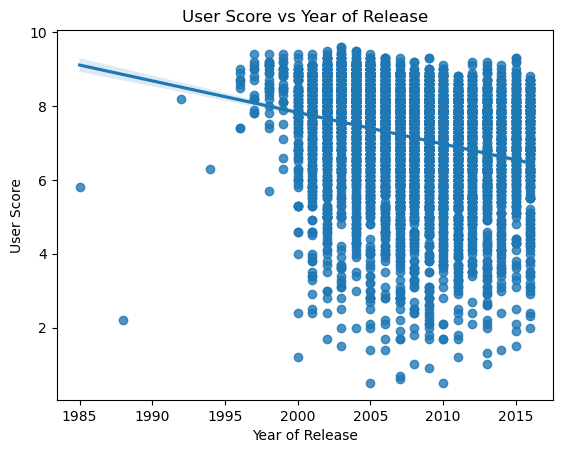

In [29]:
# create scatter plot with regression line
sb.regplot(x="Year_of_Release", y="User_Score", data=data)

# set plot title and axis labels
plt.title("User Score vs Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("User Score")

# display the plot
plt.show()

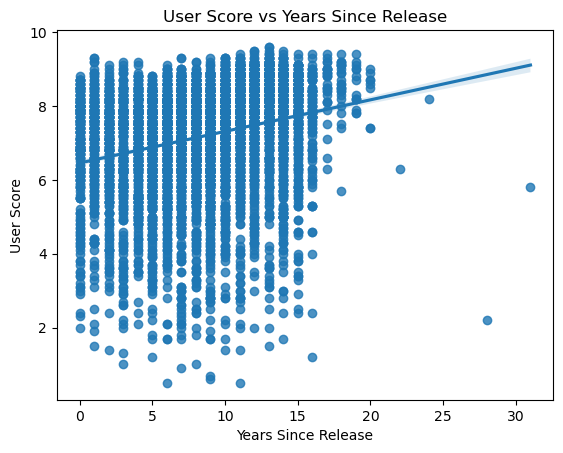

In [26]:
# create scatter plot with regression line
sb.regplot(x="years_since_release", y="User_Score", data=data)

# set plot title and axis labels
plt.title("User Score vs Years Since Release")
plt.xlabel("Years Since Release")
plt.ylabel("User Score")

# display the plot
plt.show()